In [4]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

^C
Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\lqp243\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\lqp243/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-23 Python-3.11.5 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## 3. Testing detection

In [7]:
img = 'https://miutrgv.github.io/images/resources/lab.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 1184x1920 5 persons, 8 chairs, 14 tvs, 4 laptops, 1 mouse, 2 keyboards
Speed: 915.7ms pre-process, 126.0ms inference, 8.0ms NMS per image at shape (1, 3, 416, 640)


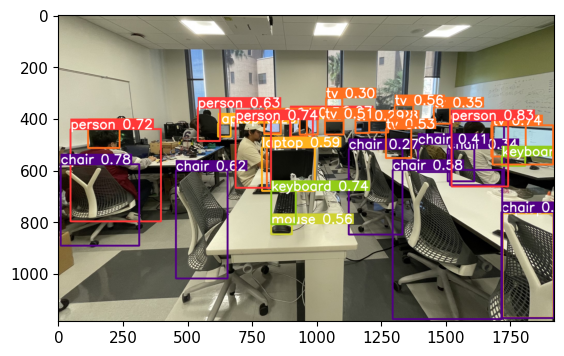

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## 4. Real Time Detections

In [3]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 5. Creating my own custom model

In [1]:
import uuid     # Creating a unique identifier
import os
import time

In [2]:
IMAGES_PATH = os.path.join('data', 'images')  # /data/images
labels = ['target']
number_imgs = 20

In [6]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')

        # Writes out image to file
        cv2.imwrite(imgname,frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
        

In [14]:
labels[0]

'target'

In [13]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        print(imgname)


data\images\target.e3ddfa46-8504-11ee-89aa-18c04d39bbcc.jpg
data\images\target.e3ddfa47-8504-11ee-bf5c-18c04d39bbcc.jpg
data\images\target.e3ddfa48-8504-11ee-9682-18c04d39bbcc.jpg
data\images\target.e3de215f-8504-11ee-8a3a-18c04d39bbcc.jpg
data\images\target.e3de2160-8504-11ee-80a8-18c04d39bbcc.jpg
data\images\target.e3de2161-8504-11ee-91a5-18c04d39bbcc.jpg
data\images\target.e3de2162-8504-11ee-8ea2-18c04d39bbcc.jpg
data\images\target.e3de2163-8504-11ee-b6ce-18c04d39bbcc.jpg
data\images\target.e3de2164-8504-11ee-ba28-18c04d39bbcc.jpg
data\images\target.e3de2165-8504-11ee-a1a8-18c04d39bbcc.jpg
data\images\target.e3de2166-8504-11ee-be9a-18c04d39bbcc.jpg
data\images\target.e3de2167-8504-11ee-a8fe-18c04d39bbcc.jpg
data\images\target.e3de2168-8504-11ee-a1b9-18c04d39bbcc.jpg
data\images\target.e3de2169-8504-11ee-9fba-18c04d39bbcc.jpg
data\images\target.e3de216a-8504-11ee-9d8c-18c04d39bbcc.jpg
data\images\target.e3de216b-8504-11ee-8a0c-18c04d39bbcc.jpg
data\images\target.e3de216c-8504-11ee-a1

In [15]:
!git clone https://github.com/HumanSignal/labelImg.git

Cloning into 'labelImg'...


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

## 6. Loading our custom model